In [1]:
#数据加载与处理
import metaknowledge as mk
import pandas as pd

#统计图表绘制
import matplotlib.pyplot as plt
import seaborn as sns

#图形内嵌到Notebook中
%matplotlib inline

#图表样式主题
# sns.set_style(style="white") # 改变绘制的背景颜色
# sns.set(font_scale=.75)      # 设置字体大小
# plt.rc("savefig", dpi=400)   # 修改生成图像的画质

#交互式图表绘制
import chart_studio.plotly as py
import plotly.graph_objs as go


#英文为罗马字体并显示负号，图形分辨率为200
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.dpi'] = 120

In [2]:
RC = mk.RecordCollection(r'D:\python科学计量可视化\数据\Demo data\Python-Wos',cached=True)

In [3]:
data_by_year = pd.DataFrame(RC.timeSeries('year'))
data_by_year 

,entry,count,year
0,2021,132,2021
1,2020,651,2020
2,2019,508,2019
3,2018,637,2018
4,2017,735,2017
5,2016,712,2016
6,2015,666,2015
7,2014,667,2014
8,2013,585,2013
9,2012,560,2012


In [4]:
data_by_year['sum_acc'] =  data_by_year['count'][::-1].cumsum()
data_by_year

,entry,count,year,sum_acc
0,2021,132,2021,6358
1,2020,651,2020,6226
2,2019,508,2019,5575
3,2018,637,2018,5067
4,2017,735,2017,4430
5,2016,712,2016,3695
6,2015,666,2015,2983
7,2014,667,2014,2317
8,2013,585,2013,1650
9,2012,560,2012,1065


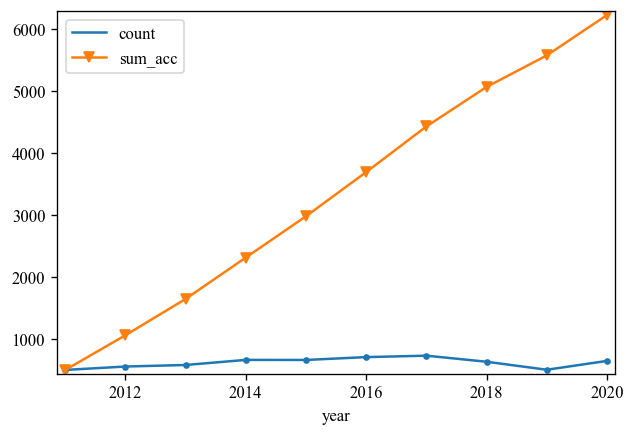

In [5]:
ax = plt.subplot()
data_by_year[1:].plot(x='year',y='count',ax=ax,marker='.')
data_by_year[1:].plot(x='year',y='sum_acc',ax=ax,marker='v')

(500.0, 7000.0)

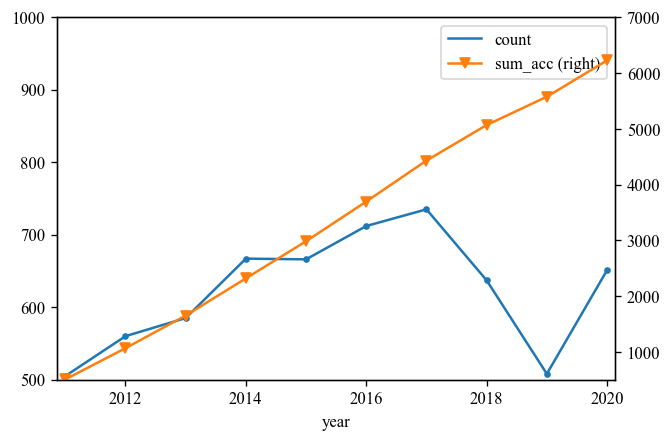

In [6]:
ax = plt.subplot()
data_by_year[1:].plot(x='year',y='count',ax=ax,ylim=[500,1000],marker='.')
data_by_year[1:].plot(x='year',y='sum_acc',ax=ax,secondary_y = True,marker='v')
plt.ylim([500,7000])

In [7]:
pd.DataFrame(RC.timeSeries('journal',outputFile='journal_year.csv'))

,entry,count,year
0,SCIENTOMETRICS,76,2021
1,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,56,2021
2,SCIENTOMETRICS,443,2020
3,JOURNAL OF INFORMETRICS,82,2020
4,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,126,2020
5,SCIENTOMETRICS,307,2019
6,JOURNAL OF INFORMETRICS,81,2019
7,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,120,2019
8,SCIENTOMETRICS,397,2018
9,JOURNAL OF INFORMETRICS,95,2018


In [8]:
pd.DataFrame(RC.timeSeries('AU',outputFile='au.csv',greatestFirst=True))

,entry,count,year
0,"Li, J",1,2021
1,"Thelwall, M",3,2021
2,"Bornmann, L",1,2021
3,"Leydesdorff, L",1,2021
4,"Yan, EJ",1,2021
...,...,...,...
13582,"Zheng, HT",1,2011
13583,"Lu, BG",1,2011
13584,"Wu, KH",1,2011
13585,"Mazanderani, F",1,2011


In [9]:
subset = ['SCIENTOMETRICS','JOURNAL OF INFORMETRICS']

growth_by_journal = pd.DataFrame(RC.timeSeries('journal', 
    outputFile = 'growth_journals.csv', limitTo = subset))
growth_by_journal[:10]

,entry,count,year
0,SCIENTOMETRICS,76,2021
1,SCIENTOMETRICS,443,2020
2,JOURNAL OF INFORMETRICS,82,2020
3,SCIENTOMETRICS,307,2019
4,JOURNAL OF INFORMETRICS,81,2019
5,SCIENTOMETRICS,397,2018
6,JOURNAL OF INFORMETRICS,95,2018
7,SCIENTOMETRICS,396,2017
8,JOURNAL OF INFORMETRICS,107,2017
9,SCIENTOMETRICS,378,2016


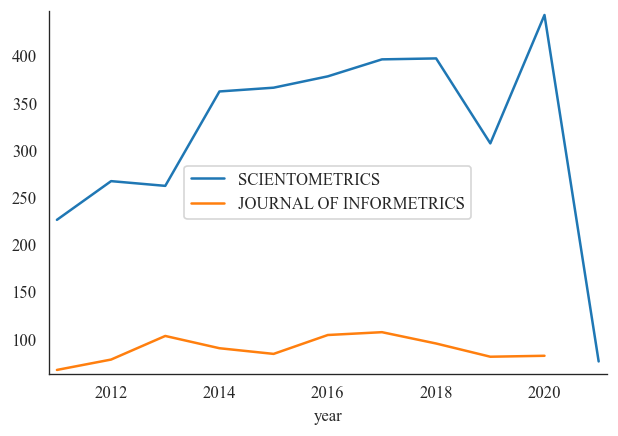

In [10]:
with sns.axes_style("white"):
    ax = plt.subplot()
    growth_by_scientometrics = growth_by_journal[growth_by_journal['entry'] == 'SCIENTOMETRICS'][::-1]
    growth_by_informetrics = growth_by_journal[growth_by_journal['entry'] == 'JOURNAL OF INFORMETRICS'][::-1]
    growth_by_scientometrics.plot(ax = ax, y ='count', x = 'year', label = 'SCIENTOMETRICS')
    growth_by_informetrics.plot(ax = ax, y ='count', x = 'year', label = 'JOURNAL OF INFORMETRICS')
    sns.despine()
plt.savefig('growth_compare.pdf')

In [11]:
pd.DataFrame(RC.timeSeries('journal')).entry.unique()

array(['SCIENTOMETRICS',
       'JOURNAL OF THE ASSOCIATION FOR INFORMATION SCIENCE AND TECHNOLOGY',
       'JOURNAL OF INFORMETRICS',
       'JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY'],
      dtype=object)

In [12]:
growth_by_journal = pd.DataFrame(RC.timeSeries('journal',outputFile='journal_year.csv'))

In [13]:
scientometrics = growth_by_journal[(growth_by_journal.entry == 'SCIENTOMETRICS') & (growth_by_journal.year <= 2021)]
informetrics = growth_by_journal[(growth_by_journal.entry == 'JOURNAL OF INFORMETRICS') & (growth_by_journal.year <= 2021)]
jaist = growth_by_journal[(growth_by_journal.entry == 'JOURNAL OF THE ASSOCIATION FOR INFORMATION SCIENCE AND TECHNOLOGY') & (growth_by_journal.year <= 2021)]
jasist = growth_by_journal[(growth_by_journal.entry == 'JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY') & (growth_by_journal.year <= 20121)]

In [14]:
trace1 = go.Scatter(
    x = scientometrics['year'],
    y = scientometrics['count'],
    mode = 'lines+markers',
    name = 'Scientometrics'
)
trace2 = go.Scatter(
    x = informetrics['year'],
    y = informetrics['count'],
    mode = 'lines+markers',
    name = 'Journal of Informetrics'
)
trace3 = go.Scatter(
    x = jaist['year'],
    y = jaist['count'],
    mode = 'lines+markers',
    name = 'JAIST (New Name)'
)
trace4 = go.Scatter(
    x = jasist['year'],
    y = jasist['count'],
    mode = 'lines+markers',
    name = 'JASIST (Old Name)'
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    yaxis=dict(
        title='Number of Publications',
    ),
    xaxis=dict(
        title='Year',
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='growth-over-time-multiples')

In [15]:
pd.DataFrame(RC.yearSplit(2014,2021)).sort_values('TC',ascending=False).head(5)

,AB,AF,AR,AU,BP,C1,CL,CR,CT,CY,...,SO,SP,TC,TI,U1,U2,UT,VL,WC,Z9
1855,Information and communications technologies (I...,"[Hamari, Juho, Sjoklint, Mimmi, Ukkonen, Antti]",NaN,"[Hamari, J, Sjoklint, M, Ukkonen, A]",2047,"[Univ Tampere, Sch Informat Sci, Game Res Lab,...",NaN,"[AJZEN I, 1991, ORGAN BEHAV HUM DEC, V50, P179...",NaN,NaN,...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,NaN,1174,The sharing economy: Why people participate in...,[63],[1463],WOS:000383602000001,67,"[Computer Science, Information Systems, Inform...",1208
3850,The use of bibliometrics is gradually extendin...,"[Aria, Massimo, Cuccurullo, Corrado]",NaN,"[Aria, M, Cuccurullo, C]",959,"[Univ Napoli Federico II, Dept Econ & Stat, Vi...",NaN,"[Alavifard S., 2015, hindexcalculator: H-index...",NaN,NaN,...,JOURNAL OF INFORMETRICS,NaN,838,bibliometrix: An R-tool for comprehensive scie...,[163],[544],WOS:000418020600003,11,"[Computer Science, Interdisciplinary Applicati...",867
3538,Bibliometric methods are used in multiple fiel...,"[Mongeon, Philippe, Paul-Hus, Adele]",NaN,"[Mongeon, P, Paul-Hus, A]",213,"[Univ Montreal, Ecole Bibliothecon & Sci Infor...",NaN,"[Abrizah A, 2013, SCIENTOMETRICS, V94, P721, D...",NaN,NaN,...,SCIENTOMETRICS,NaN,814,The journal coverage of Web of Science and Sco...,[79],[635],WOS:000368075800012,106,"[Computer Science, Interdisciplinary Applicati...",831
841,This article aims to provide a systematic and ...,"[Harzing, Anne-Wil, Alakangas, Satu]",NaN,"[Harzing, AW, Alakangas, S]",787,"[Middlesex Univ, London NW4 4BT, England., Uni...",NaN,"[Adler NJ, 2009, ACAD MANAG LEARN EDU, V8, P72...",NaN,NaN,...,SCIENTOMETRICS,NaN,478,"Google Scholar, Scopus and the Web of Science:...",[29],[424],WOS:000369017300015,106,"[Computer Science, Interdisciplinary Applicati...",484
1348,Many studies (in information science) have loo...,"[Bornmann, Lutz, Mutz, Ruediger]",NaN,"[Bornmann, L, Mutz, R]",2215,"[Adm Headquarters Max Planck Soc, Div Sci & In...",NaN,"[Bornmann L., 2014, J AM SOC IN IN PRESS, Born...",NaN,NaN,...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,NaN,466,Growth rates of modern science: A bibliometric...,[29],[137],WOS:000363213000004,66,"[Computer Science, Information Systems, Inform...",485
